# Model Development

In this notebook, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.

Some questions we want to ask in this module

- do I know if the dealer is offering fair value for my trade-in?
- do I know if I put a fair value on my car?

Data Analytics, we often use **Model Development** to help us predict future observations from the data we have.

A Model will help us understand the exact relationship between different variables and how these variables are used to predict the result.

### Setup

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

load data and store in dataframe df:

The dataframe is saved in the data directory `data/clean_automobile.csv`.

In [2]:
# Path of the dataset
path = "data/clean_automobile.csv"
df = pd.read_csv(path, index_col=0)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


### 1. Linear Regression and Multiple Linear Regression

#### Linear Regression

One example of Data Model that we'll be using is

#### Simple Linear Regression

Simple Linear Regression is a method to help us understand the relationship between two variables:

- The predictor/independent variable (X)
- The response/dependent variable (that we want to predict) (Y)

The result of Linear Regression is a `linear function` that predicts the response (dependent) variable as a function of the predictor (independent) variable.

> *Y : Reponse Variable*
> *X : Predictor Variables*
                
#### Linear function:
> *Yhat = a + bX*

- a refers to the intercept of the regression line0, in other words: the value of Y when X is 0
- b refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit

#### Let's load the modules for linear regression

In [3]:
from sklearn.linear_model import LinearRegression

#### Create the linear regression object

In [4]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### How could Highway-mpg help us predict car price?

For this example, we want to look at how highway-mpg can help us predict car price. Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [5]:
X = df[['highway-mpg']]
Y = df[['price']]

Fit the linear model using highway-mpg.

In [6]:
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

We can output a prediction

In [7]:
Yhat = lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

#### What is the value of the intercept (a)?

In [8]:
lm.intercept_

array([38423.30585816])

#### What is the value of the slope (b)?

In [9]:
lm.coef_

array([[-821.73337832]])

#### What is the final estimated linear model we get?

As we saw above, we should get a final linear model with the structure:
> *Yhat = a + bX

Plugging in the actual values we get:

**price** = 38423.31 - 821.73 x **highway-mpg**

#### Create a linear regression object?

In [10]:
lm1 = LinearRegression()
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Train the model using 'engine-size' as the independent variable and 'price' as the dependent variable?

In [11]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Find the slope and intercept of the model?

#### Slope

In [12]:
lm1.coef_

array([[166.86001569]])

#### Intercept

In [13]:
lm1.intercept_

array([-7963.33890628])

#### What is the equation of the predicted line. You can use x and yhat or 'engine-size' or 'price'?

In [14]:
# Using X and Y

# Yhat = 38423.31-821.733 * X

# Price = 38423.31-821.733 * engine-size

#### Multiple Linear Regression

What if we want to predict car price using more than one variable?

If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:

> *Y: Response Variable*
> *X<sub>1</sub>: Predictor Variable 1* <br/>
> *X<sub>2</sub>: Predictor Variable 2* <br/>
> *X<sub>3</sub>: Predictor Variable 3* <br/>
> *X<sub>4</sub>: Predictor Variable 4* <br/>

> *a: intercept* <br/>
> *b<sub>1</sub>: coefficients of Variable 1* <br/>
> *b<sub>2</sub>: coefficients of Variable 2* <br/>
> *b<sub>3</sub>: coefficients of Variable 3* <br/>
> *b<sub>4</sub>: coefficients of Variable 4* <br/>

The equation is given by 
> Yhat = a + b<sub>1</sub>X<sub>1</sub> + b<sub>2</sub>X<sub>2</sub> + b<sub>3</sub>X<sub>3</sub> + b<sub>4</sub>X<sub>4</sub>
 
From the previous section we know that other good predictors of price could be:

- Horsepower
- Curb-weight
- Engine-size
- Highway-mpg

Let's develop a model using these variables as the predictor variables.

In [15]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Fit the linear model using the four above-mentioned variables.

In [16]:
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

What is the value of intercept (a) ?

In [17]:
lm.intercept_

-15811.863767729232

What are the values of the coefficients (b<sub>1</sub>, b<sub>2</sub>, b<sub>3</sub>, b<sub>4</sub>)?

In [18]:
lm.coef_

array([53.53022809,  4.70805253, 81.51280006, 36.1593925 ])

What is the final estimated linear model that we get?

As we saw above, we should get a final linear function with the structure:

> *Yhat = a + b<sub>1</sub>X<sub>1</sub> + b<sub>2</sub>X<sub>2</sub> + b<sub>3</sub>X<sub>3</sub> + b<sub>4</sub>X<sub>4</sub>* <br/>

what is the linear function we get in this example?

**Price** = -15678.742628061467 + 52.65851272 x **horsepower** + 4.69878948 x **curb-weight** + 81.95906216 x **engine-size** + 33.58258185 x **highway-mpg**


Create and train a Multiple Linear Regression model lm2 where the response variable is price, and the predictor variable is `normalized-losses` and `highway-mpg`.

In [19]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses', 'highway-mpg']], df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Find the coefficient of the model?

In [20]:
lm2.coef_

array([   1.49789586, -820.45434016])

### 2. Model Evaluation using Visualization

Now that we've developed some models, how do we evaluate our models and how do we choose the best one? One way to do this is by using visualization.

import the visualization package: seaborn

In [21]:
# Import the visualization package - seaborn

import seaborn as sns
%matplotlib inline

#### Regression Plot

When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using **regression plots**.

This plot will show a combination of a scattered data points (a **scatter plot**), as well as the fitted **linear regression** line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

Let's visualize Horsepower as potential predictor variable of price:

(0, 48272.17561286058)

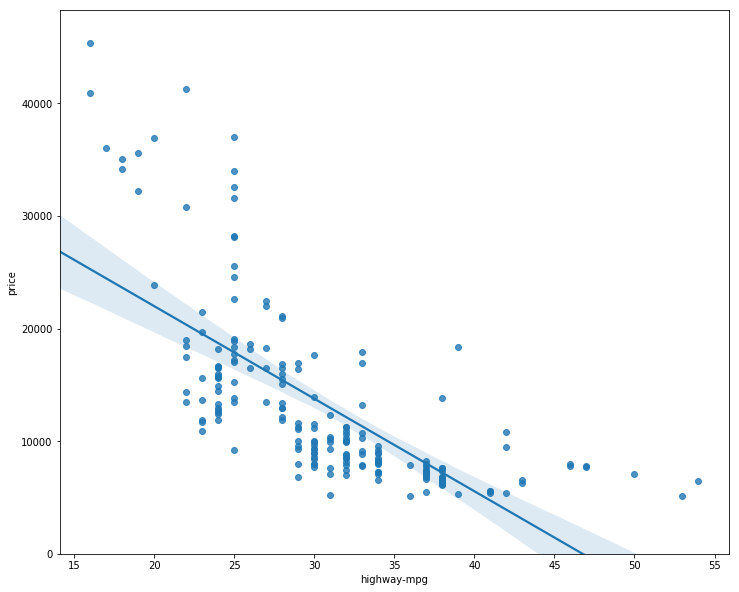

In [22]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative. One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data. Let's compare this plot to the regression plot of "peak-rpm".

(0, 47422.919330307624)

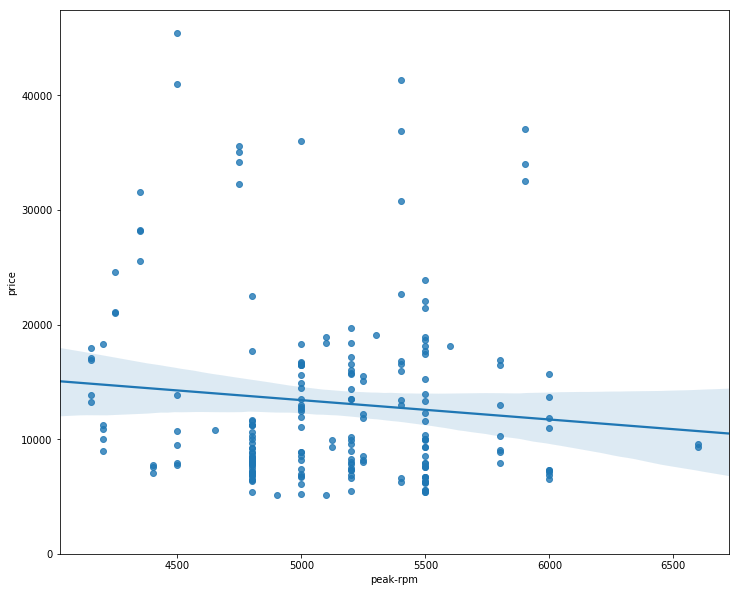

In [23]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.

Given the regression plots above is "peak-rpm" or "highway-mpg" more strongly correlated with "price"?. Use the method ".corr()" to verify your answer.

The variable "peak-rpm" has a stronger correlation with "price", it is approximate -0.704692  compared to   "highway-mpg" which is approximate     -0.101616. You can verify it using the following command:

In [24]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


#### Residual Plot

A good way to visualize the variance of the data is to use a residual plot.

What is a **residual**?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a **residual plot**?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

- If the points in a **residual plot are randomly spread out around the x-axis**, then a **linear model is appropriate** for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

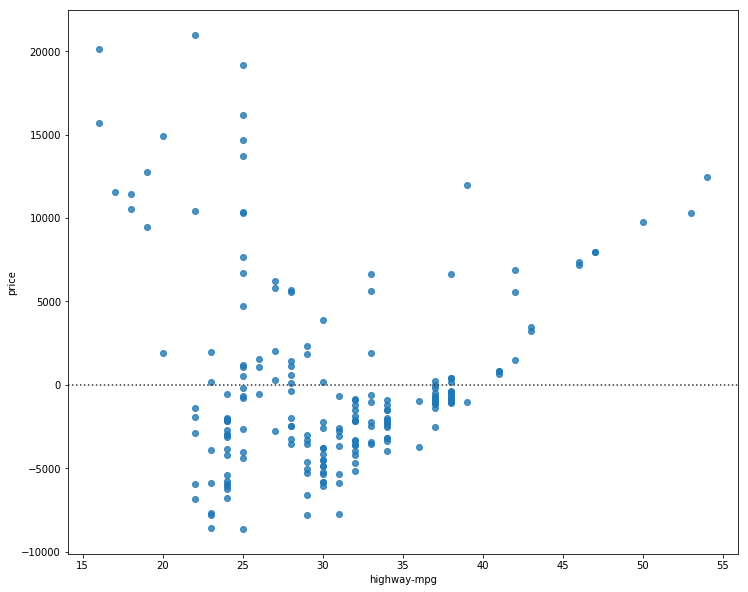

In [25]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

*What is this plot telling us?*

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.


#### Multiple Linear Regression
How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the **distribution plot**: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

First lets make a prediction

In [26]:
Y_hat = lm.predict(Z)

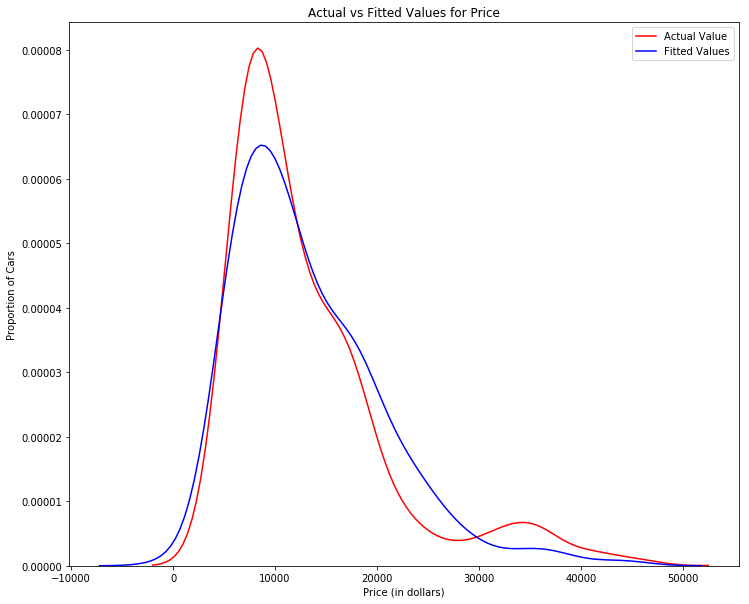

In [27]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
sns.distplot(Y_hat, hist=False, color='b', label='Fitted Values', ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

### 3. Polynomial Regression and Pipelines

**Polynomial regression** is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

There are different orders of polynomial regression:
> **Quadratic - 2nd order** <br />
> Yhat = a + b<sub>1</sub>X<sup>2</sup> + b<sub>2</sub>X<sup>2</sup> <br />

> **Cubic - 3rd order** <br />
> Yhat = a + b<sub>1</sub>X<sup>2</sup> + b<sub>2</sub>X<sup>2</sup> + b<sub>3</sub>X<sup>3</sup> <br />

> **Higher order** <br />
> Yhat = a + b<sub>1</sub>X<sup>2</sup> + b<sub>2</sub>X<sup>2</sup> + b<sub>3</sub>X<sup>3</sup> + ... <br />

We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

We will use the following function to plot the data:

In [28]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Let's get the variables

In [29]:
x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.

In [30]:
# Here we use a polynomial of the 3rd order (cubic)

f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Let's plot the function

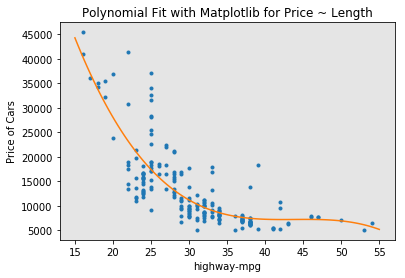

In [31]:
PlotPolly(p, x, y, 'highway-mpg')

In [32]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

#### Create 11 order polynomial model with the variables x and y from above?

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


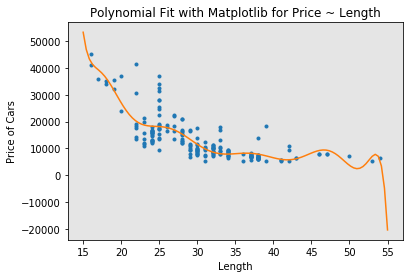

In [33]:
# calculate polynomial
# Here we use a polynomial of the 3rd order (cubic) 

f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p)
PlotPolly(p1,x,y, 'Length')

The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2)polynomial with two variables is given by:

> *Yhat = a + b<sub>1</sub>X<sub>1</sub> + b<sub>2</sub>X<sub>2</sub> + b<sub>3</sub>X<sub>1</sub>X<sub>2</sub> + b<sub>4</sub>X<sub>1</sub><sup>2</sup> + b<sub>5</sub>X<sub>2</sub><sup>2</sup> <br />

We can perform a polynomial transform on multiple features. First, we import the module:

In [34]:
from sklearn.preprocessing import PolynomialFeatures

We create a `PolynomialFeatures` object of degree 2.

In [35]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [36]:
Z_pr = pr.fit_transform(Z)

The original data is of 201 samples and 4 features

In [37]:
Z.shape

(201, 4)

after the transformation, there are 201 samples and 15 features

In [38]:
Z_pr.shape

(201, 15)

### Pipeline

Data pipelines simplify the steps of processing the data. We use the module **Pipeline** to create a pipeline. We also use **StandardScaler** as a step in our pipeline.

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline, by creating a list of tuples inlcuding the name of the model or estimator and its corresponding constructor.

In [40]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

we input the list as an argument to the pipeline constructor

In [41]:
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

We can normalize the data, perform a transform and fit the model simultaneously.

In [42]:
pipe.fit(Z, y)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously

In [43]:
ypipe = pipe.predict(Z)
ypipe[0:4]

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955])

#### Create a pipeline that Standardizes the data, then perform prediction using a linear regression model using the features Z and targets y

In [44]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13699.07700462, 13699.07700462, 19052.71346719, 10620.61524404,
       15520.90025344, 13869.27463809, 15455.88834114, 15973.77411958,
       17612.7829335 , 10722.47987021])

### 4. Measures for In-Sample Evaluation

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

- **R^2 / R-squared**
- **Mean Squared Error (MSE)**

**R-squared**

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

**Mean Squared Error (MSE)**

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

#### Model 1: Simple Linear Regression

Let's calculate the R^2

In [45]:
#highway_mpg_fit
lm.fit(X, Y)

# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

Let's calculate the MSE

We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

In [46]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]


lets import the function `mean_squared_error` from the module `metrics`

In [47]:
from sklearn.metrics import mean_squared_error

we compare the predicted results with the actual results

In [48]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


#### Model 2: Multiple Linear Regression

Let's calculate the R^2

In [49]:
# fit the model 
lm.fit(Z, df['price'])

# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093732522175299


We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

Let's calculate the MSE

we produce a prediction

In [50]:
Y_predict_multifit = lm.predict(Z)

we compare the predicted results with the actual results

In [51]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11979300.34981888


#### Model 3: Polynomial Fit

Let's calculate the R^2

let’s import the function **r2_score** from the module **metrics** as we are using a different function

In [52]:
from sklearn.metrics import r2_score

We apply the function to get the value of r^2

In [53]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit

#### MSE

We can also calculate the MSE:

In [54]:
mean_squared_error(df['price'], p(x))

20474146.426361218

### 5. Prediction and Decision Making

#### Prediction

In the previous section, we trained the model using the method fit. Now we will use the method predict to produce a prediction.

Create a new input

In [55]:
new_input = np.arange(1, 100, 1).reshape(-1, 1)

Fit the model

In [56]:
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Produce a prediction

In [57]:
yhat = lm.predict(new_input)
yhat[0:5]

array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

we can plot the data

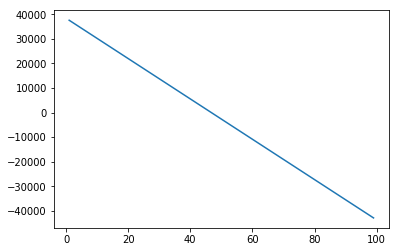

In [58]:
plt.plot(new_input, yhat)
plt.show()

### Decision Making: Determining a Good Model Fit

Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

- What is a good R-squared value?
When comparing models, **the model with the higher R-squared value is a better fit** for the data.

- What is a good MSE?
When comparing models, **the model with the smallest MSE value is a better fit** for the data.

### Let's take a look at the values for the different models.

Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

- R-squared: 0.49659118843391759
- MSE: 3.16 x10^7

Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
- R-squared: 0.80896354913783497
- MSE: 1.2 x10^7

Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
- R-squared: 0.6741946663906514
- MSE: 2.05 x 10^7

#### Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)

Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, you should always check the MSE and R^2.

So to be able to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

- **MSE** The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
- **R-squared:** In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.

#### Simple Linear Model (SLR) vs Polynomial Fit

- **MSE:** We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
- **R-squared:** The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.

Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.

#### Multiple Linear Regression (MLR) vs Polynomial Fit

- **MSE:** The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
- **R-squared:** The R-squared for the MLR is also much larger than for the Polynomial Fit.

#### Conclusion:

Comparing these three models, we conclude that **the MLR model is the best model** to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.